## 1.诊断-区分

### 1.1 最优模型

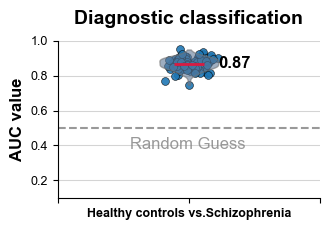

In [13]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# 读取Excel文件
data1 = pd.read_excel('./table/诊断-仅EF.xlsx', sheet_name='HolderMetrics')
data2 = pd.read_excel('./table/诊断-仅EF.xlsx', sheet_name='HolderMetrics')
data3 = pd.read_excel('./table/诊断-仅EF.xlsx', sheet_name='HolderMetrics')
# 找到每个数据集中平均BAC最高的模型
best_models = []
data_list = [data1, data2, data3]

for data in data_list:
    model_means = data.groupby('Model')['AUC'].mean()
    best_model_name = model_means.idxmax()
    best_model_data = data[data['Model'] == best_model_name]
    best_models.append(best_model_data)

AUC_data = [model['AUC'].values for model in best_models]
model_names = [model['Model'].values[0] for model in best_models]

fig, ax = plt.subplots(figsize=(3.4, 2.4))

# 添加标题
ax.set_title('Diagnostic classification', fontsize=14, fontname='Arial', fontweight='bold', pad=12)

# 绘制散点图
scatter_size = 32
scatter_alpha = 0.9
scatter_linewidths = 0.4
scatter_edgecolors = 'black'

colors = ['#1f77b4', '#1f77b4', '#1f77b4']

# 只绘制第二个散点图
ax.scatter(1 + np.random.normal(0, 0.08, size=len(AUC_data[1])), AUC_data[1], s=scatter_size, c=colors[1], alpha=scatter_alpha,
           linewidths=scatter_linewidths, edgecolors=scatter_edgecolors)

# 绘制小提琴图
violin_width = 0.45
violin_alpha = 0.6
violin_facecolor = '#5f7896'
violin_edgecolor = '#737373'
violin_meanline_color = '#d81c42'
violin_meanline_width = 2

# 只绘制第二个小提琴图
violin_parts = ax.violinplot([AUC_data[1]], positions=[1], widths=violin_width, showmeans=True,
                             showmedians=False, showextrema=False)

for part in violin_parts['bodies']:
    part.set_facecolor(violin_facecolor)
    part.set_edgecolor(violin_edgecolor)
    part.set_alpha(violin_alpha)

violin_parts['cmeans'].set_color(violin_meanline_color)
violin_parts['cmeans'].set_linewidth(violin_meanline_width)

# 添加均值标注
mean = np.mean(AUC_data[1])
ax.text(1 + violin_width/2, mean, f'{mean:.2f}', ha='left', va='center', color='black', fontsize=12, fontname='Arial', fontweight='bold')

# 设置图例
legend_fontsize = 12
legend_frameon = False

# 设置坐标轴标签和范围
ax.set_xticks([0, 1, 2])
ax.set_xticklabels([
    '',
    'Healthy controls vs.Schizophrenia', 
    '',
], rotation=0, ha='center', fontsize=10, fontname='Arial', fontweight='bold')

ax.set_ylabel('AUC value', fontsize=12, fontname='Arial', fontweight='bold')

y_min = 0.1
y_max = 1.0
ax.set_ylim(y_min, y_max)

# 设置刻度标签的字体大小
ax.tick_params(axis='both', which='major', labelsize=8)

# 添加随机猜测的虚线
ax.axhline(y=0.5, color='gray', linestyle='--', linewidth=1.5, alpha=0.8)
ax.text(0.55, 0.38, 'Random Guess', color='gray', fontsize=12, fontname='Arial', alpha=0.8)

# 设置刻度线和网格
ax.tick_params(axis='both', which='major', labelsize=9, labelfontfamily='Arial')

grid_linestyle = '-'
grid_color = 'black'
grid_alpha = 0.17

ax.yaxis.grid(True, linestyle=grid_linestyle, which='major', color=grid_color, alpha=grid_alpha)
ax.set_axisbelow(True)

# 设置顶部和右侧边框不可见
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

# 保存图像为800 dpi
plt.savefig('./image/诊断主结果.jpg', dpi=1200)

plt.show()

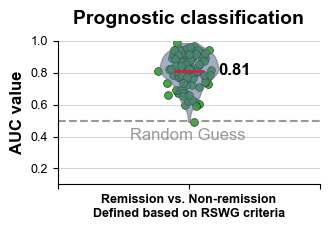

In [14]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# 读取Excel文件
data1 = pd.read_excel('./table/预后-仅EF.xlsx', sheet_name='HolderMetrics')
data2 = pd.read_excel('./table/预后-仅EF.xlsx', sheet_name='HolderMetrics')
data3 = pd.read_excel('./table/预后-仅EF.xlsx', sheet_name='HolderMetrics')

# 找到每个数据集中平均BAC最高的模型
best_models = []
data_list = [data1, data2, data3]

for data in data_list:
    model_means = data.groupby('Model')['AUC'].mean()
    best_model_name = model_means.idxmax()
    best_model_data = data[data['Model'] == best_model_name]
    best_models.append(best_model_data)

AUC_data = [model['AUC'].values for model in best_models]
model_names = [model['Model'].values[0] for model in best_models]

fig, ax = plt.subplots(figsize=(3.4, 2.4))

# 添加标题
ax.set_title('Prognostic classification', fontsize=14, fontname='Arial', fontweight='bold', pad=12)

# 绘制散点图
scatter_size = 32
scatter_alpha = 0.9
scatter_linewidths = 0.4
scatter_edgecolors = 'black'

colors = ['#2ca02c', '#2ca02c', '#2ca02c']

# 只绘制第二个散点图
ax.scatter(1 + np.random.normal(0, 0.08, size=len(AUC_data[1])), AUC_data[1], s=scatter_size, c=colors[1], alpha=scatter_alpha,
           linewidths=scatter_linewidths, edgecolors=scatter_edgecolors)

# 绘制小提琴图
violin_width = 0.45
violin_alpha = 0.6
violin_facecolor = '#5f7896'
violin_edgecolor = '#737373'
violin_meanline_color = '#d81c42'
violin_meanline_width = 2

# 只绘制第二个小提琴图
violin_parts = ax.violinplot([AUC_data[1]], positions=[1], widths=violin_width, showmeans=True,
                             showmedians=False, showextrema=False)

for part in violin_parts['bodies']:
    part.set_facecolor(violin_facecolor)
    part.set_edgecolor(violin_edgecolor)
    part.set_alpha(violin_alpha)

violin_parts['cmeans'].set_color(violin_meanline_color)
violin_parts['cmeans'].set_linewidth(violin_meanline_width)

# 添加均值标注
mean = np.mean(AUC_data[1])
ax.text(1 + violin_width/2, mean, f'{mean:.2f}', ha='left', va='center', color='black', fontsize=12, fontname='Arial', fontweight='bold')

# 设置图例
legend_fontsize = 12
legend_frameon = False

# 设置坐标轴标签和范围
ax.set_xticks([0, 1, 2])
ax.set_xticklabels([
    '',
    'Remission vs. Non-remission\nDefined based on RSWG criteria', 
    '',
], rotation=0, ha='center', fontsize=10, fontname='Arial', fontweight='bold')

ax.set_ylabel('AUC value', fontsize=12, fontname='Arial', fontweight='bold')

y_min = 0.1
y_max = 1.0
ax.set_ylim(y_min, y_max)

# 设置刻度标签的字体大小
ax.tick_params(axis='both', which='major', labelsize=8)

# 添加随机猜测的虚线
ax.axhline(y=0.5, color='gray', linestyle='--', linewidth=1.5, alpha=0.8)
ax.text(0.55, 0.38, 'Random Guess', color='gray', fontsize=12, fontname='Arial', alpha=0.8)

# 设置刻度线和网格
ax.tick_params(axis='both', which='major', labelsize=9, labelfontfamily='Arial')

grid_linestyle = '-'
grid_color = 'black'
grid_alpha = 0.17

ax.yaxis.grid(True, linestyle=grid_linestyle, which='major', color=grid_color, alpha=grid_alpha)
ax.set_axisbelow(True)

# 设置顶部和右侧边框不可见
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

# 保存图像为800 dpi
plt.savefig('./image/预后主结果.jpg', dpi=1200)

plt.show()

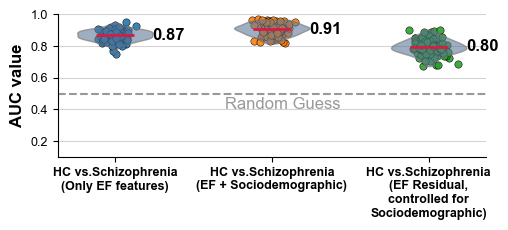

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# 读取Excel文件
data1 = pd.read_excel('./table/诊断-仅EF.xlsx', sheet_name='HolderMetrics')
data2 = pd.read_excel('./table/诊断EF+社会人口.xlsx', sheet_name='HolderMetrics')
data3 = pd.read_excel('./table/诊断-EF残差.xlsx', sheet_name='HolderMetrics')
# 对数据框架2重命名'AUC'列
data2 = data2.rename(columns={'AUC': 'AUC'})

# 找到每个数据集中平均BAC最高的模型
best_models = []
data_list = [data1, data2, data3]

for data in data_list:
    model_means = data.groupby('Model')['AUC'].mean()
    best_model_name = model_means.idxmax()
    best_model_data = data[data['Model'] == best_model_name]
    best_models.append(best_model_data)

AUC_data = [model['AUC'].values for model in best_models]
model_names = [model['Model'].values[0] for model in best_models]


fig, ax = plt.subplots(figsize=(5.2, 2.4))


# 绘制散点图
scatter_size = 28
scatter_alpha = 0.9
scatter_linewidths = 0.4

scatter_edgecolors = 'black'

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

for i, AUC in enumerate(AUC_data):
    ax.scatter(i + np.random.normal(0, 0.055, size=len(AUC)), AUC, s=scatter_size, c=colors[i], alpha=scatter_alpha,
               linewidths=scatter_linewidths, edgecolors=scatter_edgecolors)

# 绘制小提琴图
violin_width = 0.48
violin_alpha = 0.6
violin_facecolor = '#5f7896'
violin_edgecolor = '#737373'
violin_meanline_color = '#d81c42'
violin_meanline_width = 2

violin_parts = ax.violinplot(AUC_data, positions=list(range(len(AUC_data))), widths=violin_width, showmeans=True,
                             showmedians=False, showextrema=False)

for part in violin_parts['bodies']:
    part.set_facecolor(violin_facecolor)
    part.set_edgecolor(violin_edgecolor)
    part.set_alpha(violin_alpha)

violin_parts['cmeans'].set_color(violin_meanline_color)
violin_parts['cmeans'].set_linewidth(violin_meanline_width)

# 添加均值标注
for i, AUC in enumerate(AUC_data):
    mean = np.mean(AUC)
    ax.text(i + violin_width/2, mean, f'{mean:.2f}', ha='left', va='center', color='black', fontsize=12, fontname='Arial', fontweight='bold')

# 设置图例
legend_fontsize = 12
legend_frameon = False

# 设置坐标轴标签和范围
ax.set_xticks(list(range(len(AUC_data))))

ax.set_xticklabels([
    'HC vs.Schizophrenia\n(Only EF features)',
    'HC vs.Schizophrenia\n(EF + Sociodemographic)',
    'HC vs.Schizophrenia\n(EF Residual,\ncontrolled for\nSociodemographic)',
], rotation=0, ha='center', fontsize=10, fontweight='bold')


ax.set_ylabel('AUC value', fontsize=12, fontname='Arial', fontweight='bold')

y_min = 0.1
y_max = 1.0
ax.set_ylim(y_min, y_max)


# 设置刻度标签的字体大小
ax.tick_params(axis='both', which='major', labelsize=8)


# 添加随机猜测的虚线
ax.axhline(y=0.5, color='gray', linestyle='--', linewidth=1.5, alpha=0.8)
ax.text(0.7, 0.40, 'Random Guess', color='gray', fontsize=12, fontname='Arial', alpha=0.8)

# 设置刻度线和网格
ax.tick_params(axis='both', which='major', labelsize=9, labelfontfamily='Arial')

grid_linestyle = '-'
grid_color = 'black'
grid_alpha = 0.17

ax.yaxis.grid(True, linestyle=grid_linestyle, which='major', color=grid_color, alpha=grid_alpha)
ax.set_axisbelow(True)

# 设置顶部和右侧边框不可见
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

# 保存图像为800 dpi
plt.savefig('./image/best_model_AUC_comparison_Diagnosis.jpg', dpi=1200)

plt.show()

### 1.2 Stacking模型

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# 读取Excel文件
data1 = pd.read_excel('诊断-仅EFmodel_metrics.xlsx', sheet_name='HolderMetrics')
data2 = pd.read_excel('诊断EF+社会人口-model_metrics.xlsx', sheet_name='HolderMetrics')
data3 = pd.read_excel('诊断-EF残差.xlsx', sheet_name='HolderMetrics')
data4 = pd.read_excel('预后-仅EF.xlsx', sheet_name='HolderMetrics')
data5 = pd.read_excel('预后EF+社会人口.xlsx', sheet_name='HolderMetrics')
data6 = pd.read_excel('预后-EF残差.xlsx', sheet_name='HolderMetrics')

# 筛选出Model为Stacking的数据
data_list = [data1, data2, data3, data4, data5, data6]
filtered_data = [data[data['Model'] == 'Stacking'] for data in data_list]

filtered_data[1] = filtered_data[1].rename(columns={'AUC': 'AUC'})

AUC_data = [data['AUC'].values[:100] for data in filtered_data]

fig, ax = plt.subplots(figsize=(8, 4))

# 绘制散点图
scatter_size = 15
scatter_alpha = 0.7
scatter_linewidths = 0.5
scatter_edgecolors = 'black'

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

for i, AUC in enumerate(AUC_data):
    ax.scatter(i + np.random.normal(0, 0.02, size=len(AUC)), AUC, s=scatter_size, c=colors[i], alpha=scatter_alpha,
               linewidths=scatter_linewidths, edgecolors=scatter_edgecolors)

# 绘制小提琴图
violin_width = 0.2
violin_alpha = 0.6
violin_facecolor = '#5f7896'
violin_edgecolor = '#737373'
violin_meanline_color = '#d81c42'
violin_meanline_width = 2

violin_parts = ax.violinplot(AUC_data, positions=list(range(len(AUC_data))), widths=violin_width, showmeans=True,
                             showmedians=False, showextrema=False)

for part in violin_parts['bodies']:
    part.set_facecolor(violin_facecolor)
    part.set_edgecolor(violin_edgecolor)
    part.set_alpha(violin_alpha)

violin_parts['cmeans'].set_color(violin_meanline_color)
violin_parts['cmeans'].set_linewidth(violin_meanline_width)

# 添加均值标注
for i, AUC in enumerate(AUC_data):
    mean = np.mean(AUC)
    ax.text(i + violin_width/2, mean, f'{mean:.2f}', ha='left', va='center', color='black', fontsize=12, fontname='Arial', fontweight='bold')

# 设置图例
legend_fontsize = 12
legend_frameon = False

# 设置坐标轴标签和范围
ax.set_xticks(list(range(len(AUC_data))))
ax.set_xticklabels([
    'Diag.\nEF Only',
    'Diag.\nEF & Demo',
    'Diag.\nEF Residual',
    'Prog.\nEF Only',
    'Prog.\nEF & Demo',
    'Prog.\nEF Residual'
], rotation=25, ha='right')


ax.set_ylabel('Balanced accuracy', fontsize=12, fontname='Arial', fontweight='bold')

y_min = 0.1
y_max = 1.0
ax.set_ylim(y_min, y_max)

# 添加随机猜测的虚线
ax.axhline(y=0.5, color='gray', linestyle='--', linewidth=1.5, alpha=0.8)
ax.text(-0.5, 0.52, 'Random Guess', color='gray', fontsize=12, fontname='Arial', alpha=0.8)

# 设置刻度线和网格
ax.tick_params(axis='both', which='major', labelsize=12)

grid_linestyle = '-'
grid_color = 'black'
grid_alpha = 0.17

ax.yaxis.grid(True, linestyle=grid_linestyle, which='major', color=grid_color, alpha=grid_alpha)
ax.set_axisbelow(True)

# 设置顶部和右侧边框不可见
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

# 保存图像为800 dpi
plt.savefig('AUC_comparison.jpg', dpi=800)

plt.show()

## 2.诊断-阴阳

## 3.预后-

#### 1.主结果

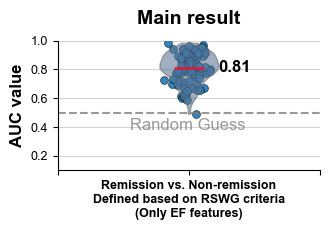

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# 读取Excel文件
data1 = pd.read_excel('./table/预后-仅EF.xlsx', sheet_name='HolderMetrics')
data2 = pd.read_excel('./table/预后-仅EF.xlsx', sheet_name='HolderMetrics')
data3 = pd.read_excel('./table/预后-仅EF.xlsx', sheet_name='HolderMetrics')

# 找到每个数据集中平均BAC最高的模型
best_models = []
data_list = [data1, data2, data3]

for data in data_list:
    model_means = data.groupby('Model')['AUC'].mean()
    best_model_name = model_means.idxmax()
    best_model_data = data[data['Model'] == best_model_name]
    best_models.append(best_model_data)

AUC_data = [model['AUC'].values for model in best_models]
model_names = [model['Model'].values[0] for model in best_models]

fig, ax = plt.subplots(figsize=(3.4, 2.4))

# 添加标题
ax.set_title('Main result', fontsize=14, fontname='Arial', fontweight='bold', pad=12)

# 绘制散点图
scatter_size = 32
scatter_alpha = 0.9
scatter_linewidths = 0.4
scatter_edgecolors = 'black'

colors = ['#1f77b4', '#1f77b4', '#1f77b4']

# 只绘制第二个散点图
ax.scatter(1 + np.random.normal(0, 0.08, size=len(AUC_data[1])), AUC_data[1], s=scatter_size, c=colors[1], alpha=scatter_alpha,
           linewidths=scatter_linewidths, edgecolors=scatter_edgecolors)

# 绘制小提琴图
violin_width = 0.45
violin_alpha = 0.6
violin_facecolor = '#5f7896'
violin_edgecolor = '#737373'
violin_meanline_color = '#d81c42'
violin_meanline_width = 2

# 只绘制第二个小提琴图
violin_parts = ax.violinplot([AUC_data[1]], positions=[1], widths=violin_width, showmeans=True,
                             showmedians=False, showextrema=False)

for part in violin_parts['bodies']:
    part.set_facecolor(violin_facecolor)
    part.set_edgecolor(violin_edgecolor)
    part.set_alpha(violin_alpha)

violin_parts['cmeans'].set_color(violin_meanline_color)
violin_parts['cmeans'].set_linewidth(violin_meanline_width)

# 添加均值标注
mean = np.mean(AUC_data[1])
ax.text(1 + violin_width/2, mean, f'{mean:.2f}', ha='left', va='center', color='black', fontsize=12, fontname='Arial', fontweight='bold')

# 设置图例
legend_fontsize = 12
legend_frameon = False

# 设置坐标轴标签和范围
ax.set_xticks([0, 1, 2])
ax.set_xticklabels([
    '',
    'Remission vs. Non-remission\nDefined based on RSWG criteria\n(Only EF features)', 
    '',
], rotation=0, ha='center', fontsize=10, fontname='Arial', fontweight='bold')

ax.set_ylabel('AUC value', fontsize=12, fontname='Arial', fontweight='bold')

y_min = 0.1
y_max = 1.0
ax.set_ylim(y_min, y_max)

# 设置刻度标签的字体大小
ax.tick_params(axis='both', which='major', labelsize=8)

# 添加随机猜测的虚线
ax.axhline(y=0.5, color='gray', linestyle='--', linewidth=1.5, alpha=0.8)
ax.text(0.55, 0.38, 'Random Guess', color='gray', fontsize=12, fontname='Arial', alpha=0.8)

# 设置刻度线和网格
ax.tick_params(axis='both', which='major', labelsize=9, labelfontfamily='Arial')

grid_linestyle = '-'
grid_color = 'black'
grid_alpha = 0.17

ax.yaxis.grid(True, linestyle=grid_linestyle, which='major', color=grid_color, alpha=grid_alpha)
ax.set_axisbelow(True)

# 设置顶部和右侧边框不可见
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

# 保存图像为800 dpi
plt.savefig('./image/Main result.jpg', dpi=1200)

plt.show()

### 2.不同预后结果

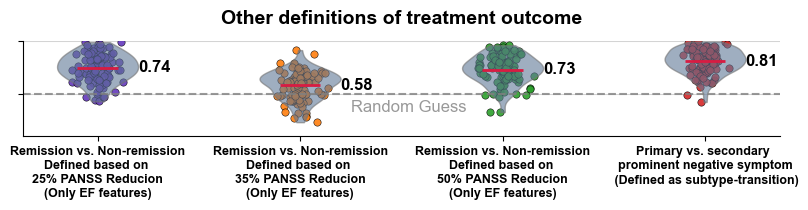

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# 读取Excel文件
data1 = pd.read_excel('./table/分类预后-仅EF-0.25.xlsx', sheet_name='HolderMetrics')
data2 = pd.read_excel('./table/分类预后-仅EF-0.35.xlsx', sheet_name='HolderMetrics')
data3 = pd.read_excel('./table/分类预后-仅EF-0.50.xlsx', sheet_name='HolderMetrics')
data4 = pd.read_excel('./table/Sec. Neg. Sym. EF Only.xlsx', sheet_name='HolderMetrics')

# 找到每个数据集中平均AUC最高的模型,data4使用第二高的模型
best_models = []
data_list = [data1, data2, data3]

for data in data_list:
    model_means = data.groupby('Model')['AUC'].mean()
    best_model_name = model_means.idxmax()
    best_model_data = data[data['Model'] == best_model_name]
    best_models.append(best_model_data)

# 对于data4,选择AUC均值第二高的模型，因为最高AUC模型的BAC非常低，存在过拟合
model_means_data4 = data4.groupby('Model')['AUC'].mean().sort_values(ascending=False)
second_best_model_name_data4 = model_means_data4.index[1]  # 获取AUC均值第二高的模型名称
second_best_model_data_data4 = data4[data4['Model'] == second_best_model_name_data4]
best_models.append(second_best_model_data_data4)

AUC_data = [model['AUC'].values for model in best_models]
model_names = [model['Model'].values[0] for model in best_models]


fig, ax = plt.subplots(figsize=(8.4, 2.2))

# 添加标题
ax.set_title('Other definitions of treatment outcome', fontsize=14, fontname='Arial', fontweight='bold', pad=12)

# 绘制散点图
scatter_size = 28
scatter_alpha = 0.9
scatter_linewidths = 0.4

scatter_edgecolors = 'black'

colors = ['#6438bd', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
for i, AUC in enumerate(AUC_data):
    ax.scatter(i + np.random.normal(0, 0.055, size=len(AUC)), AUC, s=scatter_size, c=colors[i], alpha=scatter_alpha,
               linewidths=scatter_linewidths, edgecolors=scatter_edgecolors)

# 绘制小提琴图
violin_width = 0.40
violin_alpha = 0.6
violin_facecolor = '#5f7896'
violin_edgecolor = '#737373'
violin_meanline_color = '#d81c42'
violin_meanline_width = 2

violin_parts = ax.violinplot(AUC_data, positions=list(range(len(AUC_data))), widths=violin_width, showmeans=True,
                             showmedians=False, showextrema=False)

for part in violin_parts['bodies']:
    part.set_facecolor(violin_facecolor)
    part.set_edgecolor(violin_edgecolor)
    part.set_alpha(violin_alpha)

violin_parts['cmeans'].set_color(violin_meanline_color)
violin_parts['cmeans'].set_linewidth(violin_meanline_width)

# 添加均值标注
for i, AUC in enumerate(AUC_data):
    mean = np.mean(AUC)
    ax.text(i + violin_width/2, mean, f'{mean:.2f}', ha='left', va='center', color='black', fontsize=12, fontname='Arial', fontweight='bold')

# 设置图例
legend_fontsize = 12
legend_frameon = False

# 设置坐标轴标签和范围
ax.set_xticks(list(range(len(AUC_data))))

ax.set_xticklabels([
   'Remission vs. Non-remission\nDefined based on \n25% PANSS Reducion\n(Only EF features)',
   'Remission vs. Non-remission\nDefined based on \n35% PANSS Reducion\n(Only EF features)',
   'Remission vs. Non-remission\nDefined based on \n50% PANSS Reducion\n(Only EF features)',
   'Primary vs. secondary \nprominent negative symptom\n (Defined as subtype-transition)'
], rotation=0, ha='center', fontsize=10, fontweight='bold')


y_min = 0.1
y_max = 1.0
ax.set_ylim(y_min, y_max)

ax.set_yticklabels([])  # 删除y轴刻度标签,保留刻度线

# 设置刻度标签的字体大小
ax.tick_params(axis='both', which='major', labelsize=8)


# 添加随机猜测的虚线
ax.axhline(y=0.5, color='gray', linestyle='--', linewidth=1.5, alpha=0.8)
ax.text(1.25, 0.33, 'Random Guess', color='gray', fontsize=12, fontname='Arial', alpha=0.8)

# 设置刻度线和网格
ax.tick_params(axis='both', which='major', labelsize=9, labelfontfamily='Arial')

grid_linestyle = '-'
grid_color = 'black'
grid_alpha = 0.17

ax.yaxis.grid(True, linestyle=grid_linestyle, which='major', color=grid_color, alpha=grid_alpha)
ax.set_axisbelow(True)

# 设置顶部和右侧边框不可见
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

# 保存图像为800 dpi
plt.savefig('./image/Other definitions of treatment outcome.jpg', dpi=1200)

plt.show()

### 4.流失偏差敏感性分析


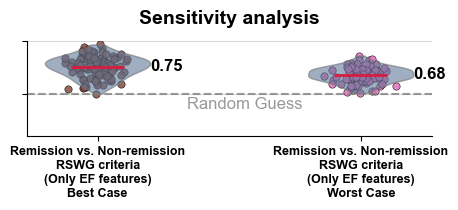

In [4]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# 读取Excel文件
data1 = pd.read_excel('./table/RSAW-仅EF-全部缓解.xlsx', sheet_name='HolderMetrics')
data2 = pd.read_excel('./table/RSWG Remission (& worse Case) .xlsx', sheet_name='HolderMetrics')

# 找到每个数据集中平均BAC最高的模型
best_models = []
data_list = [data1, data2]

for data in data_list:
    model_means = data.groupby('Model')['AUC'].mean()
    best_model_name = model_means.idxmax()
    best_model_data = data[data['Model'] == best_model_name]
    best_models.append(best_model_data)

AUC_data = [model['AUC'].values for model in best_models]
model_names = [model['Model'].values[0] for model in best_models]


fig, ax = plt.subplots(figsize=(4.8, 2.2))

# 添加标题
ax.set_title('Sensitivity analysis', fontsize=14, fontname='Arial', fontweight='bold', pad=12)

# 绘制散点图
scatter_size = 28
scatter_alpha = 0.9
scatter_linewidths = 0.4

scatter_edgecolors = 'black'

colors = ['#8c564b', '#e377c2']

for i, AUC in enumerate(AUC_data):
    ax.scatter(i + np.random.normal(0, 0.05, size=len(AUC)), AUC, s=scatter_size, c=colors[i], alpha=scatter_alpha,
               linewidths=scatter_linewidths, edgecolors=scatter_edgecolors)

# 绘制小提琴图
violin_width = 0.4
violin_alpha = 0.6
violin_facecolor = '#5f7896'
violin_edgecolor = '#737373'
violin_meanline_color = '#d81c42'
violin_meanline_width = 2
violin_parts = ax.violinplot(AUC_data, positions=list(range(len(AUC_data))), widths=violin_width, showmeans=True,
                             showmedians=False, showextrema=False)

for part in violin_parts['bodies']:
    part.set_facecolor(violin_facecolor)
    part.set_edgecolor(violin_edgecolor)
    part.set_alpha(violin_alpha)

violin_parts['cmeans'].set_color(violin_meanline_color)
violin_parts['cmeans'].set_linewidth(violin_meanline_width)

# 添加均值标注
for i, AUC in enumerate(AUC_data):
    mean = np.mean(AUC)
    ax.text(i + violin_width/2, mean, f'{mean:.2f}', ha='left', va='center', color='black', fontsize=12, fontname='Arial', fontweight='bold')

# 设置图例
legend_fontsize = 12
legend_frameon = False

# 设置坐标轴标签和范围
ax.set_xticks(list(range(len(AUC_data))))

ax.set_xticklabels([
    'Remission vs. Non-remission\nRSWG criteria\n(Only EF features)\nBest Case', 
    'Remission vs. Non-remission\nRSWG criteria\n(Only EF features)\nWorst Case', 
], rotation=0, ha='center', fontsize=10, fontweight='bold')




y_min = 0.1
y_max = 1.0
ax.set_ylim(y_min, y_max)

ax.set_yticklabels([])  # 删除y轴刻度标签,保留刻度线

# 设置刻度标签的字体大小
ax.tick_params(axis='both', which='major', labelsize=8)


# 添加随机猜测的虚线
ax.axhline(y=0.5, color='gray', linestyle='--', linewidth=1.5, alpha=0.8)
ax.text(0.34, 0.36, 'Random Guess', color='gray', fontsize=12, fontname='Arial', alpha=0.8)

# 设置刻度线和网格
ax.tick_params(axis='both', which='major', labelsize=9, labelfontfamily='Arial')

grid_linestyle = '-'
grid_color = 'black'
grid_alpha = 0.17

ax.yaxis.grid(True, linestyle=grid_linestyle, which='major', color=grid_color, alpha=grid_alpha)
ax.set_axisbelow(True)

# 设置顶部和右侧边框不可见
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

# 保存图像为800 dpi
plt.savefig('./image/Sensitivity analysis.jpg', dpi=1200)

plt.show()

### 4.控制分析

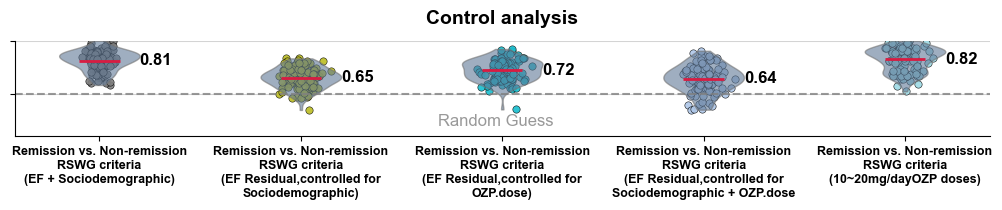

In [5]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


# 读取Excel文件
data1 = pd.read_excel('./table/预后EF+社会人口.xlsx', sheet_name='HolderMetrics')
data2 = pd.read_excel('./table/预后-EF社会人口残差.xlsx', sheet_name='HolderMetrics')
data3 = pd.read_excel('./table/RSWG Remis.EF Residual(ctrl.OLZ.dose).xlsx', sheet_name='HolderMetrics')
data4 = pd.read_excel('./table/RSWG Remis.EF Residual(ctrl.OLZ.dose+社会人口).xlsx', sheet_name='HolderMetrics')
data5 = pd.read_excel('./table/分类预后-仅EF(10~20药物).xlsx', sheet_name='HolderMetrics')

# 找到每个数据集中平均BAC最高的模型
best_models = []
data_list = [data1, data2, data3, data4, data5]

for data in data_list:
    model_means = data.groupby('Model')['AUC'].mean()
    best_model_name = model_means.idxmax()
    best_model_data = data[data['Model'] == best_model_name]
    best_models.append(best_model_data)

AUC_data = [model['AUC'].values for model in best_models]
model_names = [model['Model'].values[0] for model in best_models]

fig, ax = plt.subplots(figsize=(10.4, 2.2))


# 添加标题
ax.set_title('Control analysis', fontsize=14, fontname='Arial', fontweight='bold', pad=12)

# 绘制散点图
scatter_size = 28
scatter_alpha = 0.9
scatter_linewidths = 0.4

scatter_edgecolors = 'black'

colors = ['#7f7f7f', '#bcbd22', '#17becf', '#aec7e8', '#9edae5']

for i, AUC in enumerate(AUC_data):
    ax.scatter(i + np.random.normal(0, 0.05, size=len(AUC)), AUC, s=scatter_size, c=colors[i], alpha=scatter_alpha,
               linewidths=scatter_linewidths, edgecolors=scatter_edgecolors)

# 绘制小提琴图
violin_width = 0.4
violin_alpha = 0.6
violin_facecolor = '#5f7896'
violin_edgecolor = '#737373'
violin_meanline_color = '#d81c42'
violin_meanline_width = 2

violin_parts = ax.violinplot(AUC_data, positions=list(range(len(AUC_data))), widths=violin_width, showmeans=True,
                             showmedians=False, showextrema=False)

for part in violin_parts['bodies']:
    part.set_facecolor(violin_facecolor)
    part.set_edgecolor(violin_edgecolor)
    part.set_alpha(violin_alpha)

violin_parts['cmeans'].set_color(violin_meanline_color)
violin_parts['cmeans'].set_linewidth(violin_meanline_width)

# 添加均值标注
for i, AUC in enumerate(AUC_data):
    mean = np.mean(AUC)
    ax.text(i + violin_width/2, mean, f'{mean:.2f}', ha='left', va='center', color='black', fontsize=12, fontname='Arial', fontweight='bold')

# 设置图例
legend_fontsize = 12
legend_frameon = False

# 设置坐标轴标签和范围
ax.set_xticks(list(range(len(AUC_data))))

ax.set_xticklabels([
    'Remission vs. Non-remission\nRSWG criteria\n(EF + Sociodemographic)', 
    'Remission vs. Non-remission\nRSWG criteria\n(EF Residual,controlled for\nSociodemographic)',
    'Remission vs. Non-remission\nRSWG criteria\n(EF Residual,controlled for\nOZP.dose)',
    'Remission vs. Non-remission\nRSWG criteria\n(EF Residual,controlled for\nSociodemographic + OZP.dose',
    'Remission vs. Non-remission\nRSWG criteria\n(10~20mg/dayOZP doses)'
], rotation=0, ha='center', fontsize=10, fontweight='bold')




y_min = 0.1
y_max = 1.0
ax.set_ylim(y_min, y_max)

ax.set_yticklabels([])  # 删除y轴刻度标签,保留刻度线

# 设置刻度标签的字体大小
ax.tick_params(axis='both', which='major', labelsize=8)


# 添加随机猜测的虚线
ax.axhline(y=0.5, color='gray', linestyle='--', linewidth=1.5, alpha=0.8)
ax.text(1.68, 0.2, 'Random Guess', color='gray', fontsize=12, fontname='Arial', alpha=0.8)

# 设置刻度线和网格
ax.tick_params(axis='both', which='major', labelsize=9, labelfontfamily='Arial')

grid_linestyle = '-'
grid_color = 'black'
grid_alpha = 0.17

ax.yaxis.grid(True, linestyle=grid_linestyle, which='major', color=grid_color, alpha=grid_alpha)
ax.set_axisbelow(True)

# 设置顶部和右侧边框不可见
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

# 保存图像为800 dpi
plt.savefig('./image/Control analysis.jpg', dpi=1200)

plt.show()

## 数据分析结束

In [6]:
print("数据分析结束！")

数据分析结束！
